In [67]:
from keras import models
from keras import layers
from keras.datasets import imdb

In [68]:
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# Utility function to one-hot encode the words in each sequence in vector
def vectorize_sequences(sequences, dimension=10000):
    vectorized_sequences = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences, start=0):
        vectorized_sequences[i, sequence] = 1.
    return vectorized_sequences

In [70]:
# Loads and prepares data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/home/pradip/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pradip/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [71]:
# Checks the maximum word index in training data
print("Maximum word index in training data: ", max([np.max(seq) for seq in train_data]))

Maximum word index in training data:  9999


#### Gets the review comment in English just for reference

In [72]:
word_index_dict = imdb.get_word_index()

In [73]:
# Reverses the order of key and value pairs to search word against its index found in training data 
index_word_dict = dict([(key, word) for (word, key) in word_index_dict.items()])

In [74]:
index_word_dict

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [75]:
# Just checking for training data after joining words after mapping word with its index 
' '.join([index_word_dict[index] for index in train_data[0]])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

#### Preparing data and training model

In [76]:
# One-hot encodes words into vector
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

# Splits data training and validation data sets
validation_data = train_data[15000:]
train_data = train_data[0:15000]

train_labels = train_labels.astype(dtype='float32')
# train_labels = np.asarray(train_labels).astype('float32')
test_labels = test_labels.astype(dtype='float32')
# test_labels = np.asarray(test_labels).astype('float32')

validation_labels = train_labels[15000:]
train_labels = train_labels[0:15000]

In [77]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
# Trains model with bath size of 512 and 20 epochs
history = model.fit(train_data, train_labels, batch_size=512, epochs=20, 
                    validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 52us/step - loss: 0.5343 - accuracy: 0.7784 - val_loss: 0.4031 - val_accuracy: 0.8634
Epoch 2/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.3249 - accuracy: 0.8995 - val_loss: 0.3128 - val_accuracy: 0.8892
Epoch 3/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.2377 - accuracy: 0.9255 - val_loss: 0.2828 - val_accuracy: 0.8943
Epoch 4/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1858 - accuracy: 0.9423 - val_loss: 0.2838 - val_accuracy: 0.8861
Epoch 5/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.1516 - accuracy: 0.9519 - val_loss: 0.2841 - val_accuracy: 0.8888
Epoch 6/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1248 - accuracy: 0.9627 - val_loss: 0.2878 - val_accuracy: 0.8875
Epoch 7/20
15000/15000 [==============================] - 1s 38us/st

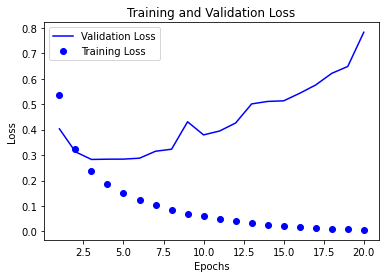

In [79]:
# Evaluates training and validation performance
history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)
validation_losses = history_dict["val_loss"]
training_losses = history_dict["loss"]

plt.plot(epochs, validation_losses, "b", label="Validation Loss")
plt.plot(epochs, training_losses, "bo", label="Training Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

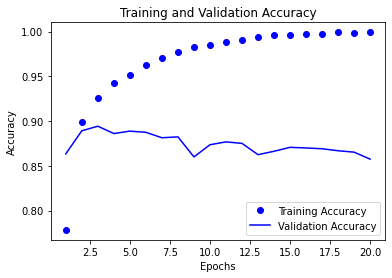

In [80]:
training_accuracies = history_dict["accuracy"]
validation_accuracies = history_dict["val_accuracy"]

plt.clf()
plt.plot(epochs, training_accuracies, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_accuracies, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
# Observing overfitting beyond 4 epochs, model is retrained with 4 epoch only.

history = model.fit(train_data, train_labels, batch_size=512, epochs=4, 
                    validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 39us/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 0.7270 - val_accuracy: 0.8647
Epoch 2/4
15000/15000 [==============================] - 1s 38us/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.7634 - val_accuracy: 0.8636
Epoch 3/4
15000/15000 [==============================] - 1s 38us/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.8134 - val_accuracy: 0.8643
Epoch 4/4
15000/15000 [==============================] - 1s 38us/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.8389 - val_accuracy: 0.8622


#### Evaluating model performance

In [82]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 55us/step
Model Performance on Test Data: Loss is  0.9150699216455221  and accuracy is  0.8450400233268738


In [83]:
# Predicting reviews
model.predict(test_data)

array([[7.9205930e-03],
       [9.9999988e-01],
       [1.1920929e-07],
       ...,
       [4.5494694e-01],
       [5.1259995e-05],
       [5.5426657e-03]], dtype=float32)

# Now, consider the above model is baselined and let's experiment with different number hiddent layers, hidden units, optimizers and activation functions.

## Increasing and decreasing hidden layers

#### Increasing hidden layers from 2 to 3

In [84]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 52us/step - loss: 0.5462 - accuracy: 0.7620 - val_loss: 0.4023 - val_accuracy: 0.8674
Epoch 2/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.3162 - accuracy: 0.9014 - val_loss: 0.3060 - val_accuracy: 0.8859
Epoch 3/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.2218 - accuracy: 0.9258 - val_loss: 0.2882 - val_accuracy: 0.8851
Epoch 4/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.1678 - accuracy: 0.9455 - val_loss: 0.2790 - val_accuracy: 0.8877
Epoch 5/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.1330 - accuracy: 0.9557 - val_loss: 0.3118 - val_accuracy: 0.8826
Epoch 6/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.1028 - accuracy: 0.9677 - val_loss: 0.3170 - val_accuracy: 0.8833


In [85]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 53us/step
Model Performance on Test Data: Loss is  0.34693423069953916  and accuracy is  0.8737199902534485


#### Decreasing hidden layers from 2 to 1

In [86]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 51us/step - loss: 0.4989 - accuracy: 0.7941 - val_loss: 0.3907 - val_accuracy: 0.8659
Epoch 2/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.3152 - accuracy: 0.9054 - val_loss: 0.3207 - val_accuracy: 0.8814
Epoch 3/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.2448 - accuracy: 0.9229 - val_loss: 0.3078 - val_accuracy: 0.8801
Epoch 4/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1999 - accuracy: 0.9392 - val_loss: 0.2760 - val_accuracy: 0.8938
Epoch 5/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1686 - accuracy: 0.9503 - val_loss: 0.2748 - val_accuracy: 0.8918
Epoch 6/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1459 - accuracy: 0.9573 - val_loss: 0.2785 - val_accuracy: 0.8896


In [87]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 54us/step
Model Performance on Test Data: Loss is  0.30089749811172484  and accuracy is  0.8781200051307678


## Increasing and decreasing hidden units

#### Increasing hidden units from 16 to 32

In [88]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 62us/step - loss: 0.5031 - accuracy: 0.7781 - val_loss: 0.3566 - val_accuracy: 0.8782
Epoch 2/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.2825 - accuracy: 0.9042 - val_loss: 0.2884 - val_accuracy: 0.8921
Epoch 3/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.2048 - accuracy: 0.9304 - val_loss: 0.2755 - val_accuracy: 0.8933
Epoch 4/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.1578 - accuracy: 0.9485 - val_loss: 0.3075 - val_accuracy: 0.8763
Epoch 5/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.1250 - accuracy: 0.9591 - val_loss: 0.3065 - val_accuracy: 0.8841
Epoch 6/6
15000/15000 [==============================] - 1s 49us/step - loss: 0.1041 - accuracy: 0.9661 - val_loss: 0.3209 - val_accuracy: 0.8849


In [89]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 60us/step
Model Performance on Test Data: Loss is  0.3442298119544983  and accuracy is  0.8732399940490723


#### Increasing hidden units from 16 to 64

In [90]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 79us/step - loss: 0.4802 - accuracy: 0.7817 - val_loss: 0.3173 - val_accuracy: 0.8844
Epoch 2/6
15000/15000 [==============================] - 1s 66us/step - loss: 0.2556 - accuracy: 0.9057 - val_loss: 0.3117 - val_accuracy: 0.8758
Epoch 3/6
15000/15000 [==============================] - 1s 66us/step - loss: 0.1949 - accuracy: 0.9270 - val_loss: 0.2873 - val_accuracy: 0.8869
Epoch 4/6
15000/15000 [==============================] - 1s 66us/step - loss: 0.1431 - accuracy: 0.9506 - val_loss: 0.2927 - val_accuracy: 0.8895
Epoch 5/6
15000/15000 [==============================] - 1s 69us/step - loss: 0.1125 - accuracy: 0.9613 - val_loss: 0.3211 - val_accuracy: 0.8847
Epoch 6/6
15000/15000 [==============================] - 1s 70us/step - loss: 0.0767 - accuracy: 0.9747 - val_loss: 0.3994 - val_accuracy: 0.8710


In [91]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 2s 74us/step
Model Performance on Test Data: Loss is  0.4535508701610565  and accuracy is  0.8525599837303162


## Using diffrent loss functions

#### Using 'mse' loss function instead of 'binary_crossentropy'

In [92]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 53us/step - loss: 0.1706 - accuracy: 0.7834 - val_loss: 0.1199 - val_accuracy: 0.8753
Epoch 2/6
15000/15000 [==============================] - 1s 40us/step - loss: 0.0931 - accuracy: 0.9053 - val_loss: 0.0928 - val_accuracy: 0.8912
Epoch 3/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.0671 - accuracy: 0.9297 - val_loss: 0.0848 - val_accuracy: 0.8937
Epoch 4/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.0518 - accuracy: 0.9463 - val_loss: 0.0819 - val_accuracy: 0.8938
Epoch 5/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.0428 - accuracy: 0.9568 - val_loss: 0.0830 - val_accuracy: 0.8889
Epoch 6/6
15000/15000 [==============================] - 1s 37us/step - loss: 0.0346 - accuracy: 0.9664 - val_loss: 0.0865 - val_accuracy: 0.8843


In [93]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 52us/step
Model Performance on Test Data: Loss is  0.09658927468061447  and accuracy is  0.8686000108718872


## Using different activtion functions

#### Using 'tanh' activation function instead of 'relu'

In [94]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 54us/step - loss: 0.4782 - accuracy: 0.7935 - val_loss: 0.3582 - val_accuracy: 0.8651
Epoch 2/6
15000/15000 [==============================] - 1s 40us/step - loss: 0.2689 - accuracy: 0.9071 - val_loss: 0.2849 - val_accuracy: 0.8878
Epoch 3/6
15000/15000 [==============================] - 1s 42us/step - loss: 0.1898 - accuracy: 0.9351 - val_loss: 0.3257 - val_accuracy: 0.8658
Epoch 4/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1460 - accuracy: 0.9499 - val_loss: 0.2964 - val_accuracy: 0.8825
Epoch 5/6
15000/15000 [==============================] - 1s 40us/step - loss: 0.1121 - accuracy: 0.9623 - val_loss: 0.3450 - val_accuracy: 0.8755
Epoch 6/6
15000/15000 [==============================] - 1s 44us/step - loss: 0.0843 - accuracy: 0.9725 - val_loss: 0.3661 - val_accuracy: 0.8772


In [95]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 55us/step
Model Performance on Test Data: Loss is  0.39115401850700376  and accuracy is  0.8659200072288513
